In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(sns.__version__)
print(np.__version__)

1.5.2
0.12.1
1.23.5


In [13]:
trdf=pd.read_csv('./dataframes/train.csv')
tedf=pd.read_csv('./dataframes/test.csv')
print(trdf.shape,tedf.shape)

(891, 12) (418, 11)


In [21]:
combine=[trdf,tedf]
for dataset in combine:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    # dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [5]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [6]:
trdf = trdf.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'],axis=1)

In [7]:
tedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


In [8]:
tedf = tedf.drop(['Name','SibSp','Parch','Cabin','Ticket'],axis=1)

In [9]:
combine=[trdf,tedf]

In [10]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

In [11]:
trdf['Embarked'] = trdf['Embarked'].fillna('S')
tedf['Fare'] = tedf['Fare'].fillna(8)

In [12]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Master':0,'Mr':1,'Mrs':2,'Miss':3}).astype(int)
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)

## 여기까지 일반 셋팅

In [13]:
for dataset in combine:
    print(dataset.isna().sum())


Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        0
Title           0
FamilySize      0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            0
Embarked        0
Title           0
FamilySize      0
dtype: int64


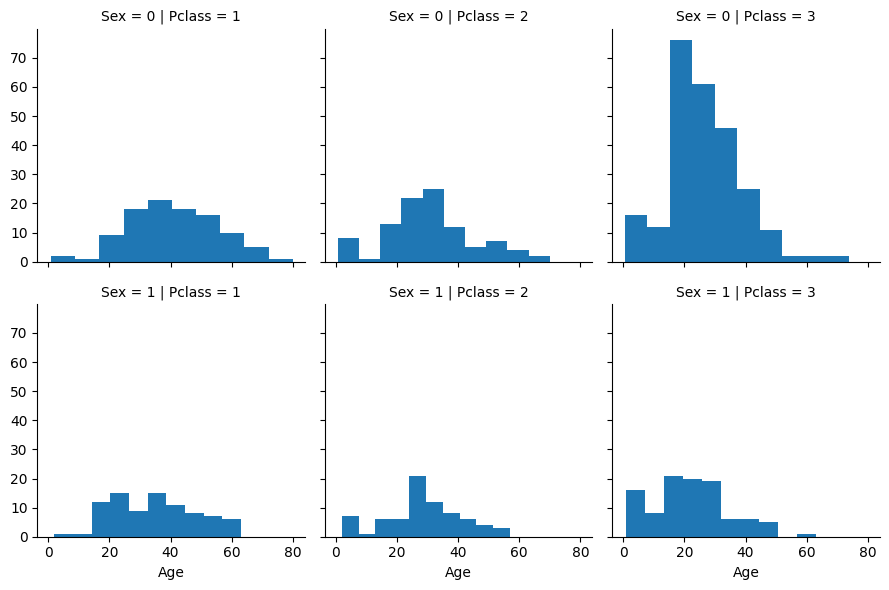

In [14]:
g=sns.FacetGrid(trdf,row='Sex',col='Pclass')
g.map(plt.hist,'Age')

In [15]:
trdf[(trdf['Pclass']==3) & (trdf['Sex']==0)].Age.mean()

26.507588932806325

In [16]:
trdf[(trdf['Age'].isnull())&(trdf['Pclass']==2)]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
17,1,2,0,NaN,13.0000,0,1,1
181,0,2,0,NaN,15.0500,2,1,1
277,0,2,0,NaN,0.0000,0,1,1
303,1,2,1,NaN,12.3500,1,3,1
413,0,2,0,NaN,0.0000,0,1,1
466,0,2,0,NaN,0.0000,0,1,1
481,0,2,0,NaN,0.0000,0,1,1
547,1,2,0,NaN,13.8625,2,1,1
596,1,2,1,NaN,33.0000,0,3,1
674,0,2,0,NaN,0.0000,0,1,1


In [17]:
#Pclass, Gender 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)&(dataset.Pclass==j+1),\
                "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [19]:
trdf['AgeBand']=pd.cut(trdf['Age'],10)
trdf[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.472441
5,"(40.0, 48.0]",0.325843
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


In [20]:
combine=[trdf,tedf]

In [21]:
for dataset in combine:
    dataset.loc[dataset["Age"]<=8,"Age"]=0
    dataset.loc[(dataset["Age"]>8)&(dataset["Age"]<=16),"Age"]=1
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=24),"Age"]=2
    dataset.loc[(dataset["Age"]>24)&(dataset["Age"]<=32),"Age"]=3
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=40),"Age"]=4
    dataset.loc[(dataset["Age"]>40)&(dataset["Age"]<=48),"Age"]=5
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=56),"Age"]=6
    dataset.loc[(dataset["Age"]>56)&(dataset["Age"]<=64),"Age"]=7
    dataset.loc[(dataset["Age"]>64)&(dataset["Age"]<=72),"Age"]=8
    dataset.loc[(dataset["Age"]>72)&(dataset["Age"]<=80),"Age"]=9
    dataset.loc[(dataset["Age"]>80),"Age"]=10
    
trdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,AgeBand
0,0,3,0,2,7.2500,0,1,2,"(16.0, 24.0]"
1,1,1,1,4,71.2833,2,2,2,"(32.0, 40.0]"
2,1,3,1,3,7.9250,0,3,1,"(24.0, 32.0]"
3,1,1,1,4,53.1000,0,2,2,"(32.0, 40.0]"
4,0,3,0,4,8.0500,0,1,1,"(32.0, 40.0]"


In [22]:
trdf=trdf.drop(['AgeBand'],axis=1)

In [23]:
trdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2,7.2500,0,1,2
1,1,1,1,4,71.2833,2,2,2
2,1,3,1,3,7.9250,0,3,1
3,1,1,1,4,53.1000,0,2,2
4,0,3,0,4,8.0500,0,1,1


In [24]:
tedf.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,4,7.8292,1,1,1
1,893,3,1,5,7.0000,0,2,2
2,894,2,0,7,9.6875,1,1,1
3,895,3,0,3,8.6625,0,1,1
4,896,3,1,2,12.2875,0,2,3


In [25]:
trdf['FareBand']=pd.qcut(trdf['Fare'],4)
trdf[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand')


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [26]:
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91) & (dataset["Fare"]<=14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454) & (dataset["Fare"]<=31.0),"Fare"]=2
    dataset.loc[(dataset["Fare"]>31.0) & (dataset["Fare"]<=512.329),"Fare"]=3


In [27]:
trdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,FareBand
0,0,3,0,2,7.2500,0,1,2,"(-0.001, 7.91]"
1,1,1,1,4,71.2833,2,2,2,"(31.0, 512.329]"
2,1,3,1,3,7.9250,0,3,1,"(7.91, 14.454]"
3,1,1,1,4,53.1000,0,2,2,"(31.0, 512.329]"
4,0,3,0,4,8.0500,0,1,1,"(7.91, 14.454]"


In [28]:
trdf=trdf.drop(["FareBand"],axis=1)
combine=[trdf,tedf]

In [29]:
tedf.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,4,0.0,1,1,1
1,893,3,1,5,0.0,0,2,2
2,894,2,0,7,1.0,1,1,1
3,895,3,0,3,1.0,0,1,1
4,896,3,1,2,1.0,0,2,3


In [33]:
X_trdf=trdf.drop('Survived',axis=1)
Y_trdf=trdf['Survived']
X_tedf=tedf.drop('PassengerId', axis=1).copy()
X_trdf.shape, Y_trdf.shape, X_tedf.shape

((891, 7), (891,), (418, 7))

## 로지스틱 레그레이션
## 렐루, 시그모이드

In [34]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_trdf,Y_trdf)
Y_pred=logreg.predict(X_tedf)
acc_log=round(logreg.score(X_trdf,Y_trdf)*100,2)
acc_log

/home/lss/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.83

### 서포트 벡터 머신

- 분류 알고리즘
- 이진데이터 분류시 최적 성능

In [35]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_trdf,Y_trdf)
Y_pred=svc.predict(X_tedf)
acc_svc=round(svc.score(X_trdf,Y_trdf)*100,2)
acc_svc

68.91

### k-NN 분류와 회귀

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_trdf,Y_trdf)
Y_pred=knn.predict(X_tedf)
acc_knn=round(knn.score(X_trdf,Y_trdf)*100,2)
acc_knn

84.18

## 나이브 베이지안

In [37]:
from sklearn.naive_bayes import GaussianNB 
gaussian=GaussianNB()
gaussian.fit(X_trdf,Y_trdf)
Y_pred=gaussian.predict(X_tedf)
acc_gaussian=round(gaussian.score(X_trdf,Y_trdf)*100,2)
acc_gaussian

79.46

## 퍼셉트론

In [38]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_trdf,Y_trdf)
Y_pred=perceptron.predict(X_tedf)
acc_perceptron=round(perceptron.score(X_trdf,Y_trdf)*100,2)
acc_perceptron

75.65

## LinearSVC

In [39]:
linear_svc=LinearSVC()
linear_svc.fit(X_trdf,Y_trdf)
Y_pred=linear_svc.predict(X_tedf)
acc_linear_svc=round(linear_svc.score(X_trdf,Y_trdf)*100,2)
acc_linear_svc

/home/lss/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


75.87

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [40]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_trdf,Y_trdf)
Y_pred=sgd.predict(X_tedf)
acc_sgd=round(sgd.score(X_trdf,Y_trdf)*100,2)
acc_sgd

73.4

## 결정트리(Decision Tree)

In [41]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_trdf,Y_trdf)
Y_pred=decision_tree.predict(X_tedf)
acc_decision_tree=round(decision_tree.score(X_trdf,Y_trdf)*100,2)
acc_decision_tree

95.17

## 랜덤 포레스트(Random Forest)

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_trdf,Y_trdf)
Y_pred=random_forest.predict(X_tedf)
acc_random_forest=round(random_forest.score(X_trdf,Y_trdf)*100,2)
acc_random_forest

95.17

## 모델 평가 순위

In [43]:
models=pd.DataFrame({
    'Model':['SVM',
             'KNN',
             'Logistic Regression',
             'Random Forest',
             'Naive Bayes',
             'Perceptron',
             'SGD',
             'L-SVC',
             'Decision Tree'],
    'Score':[
        acc_svc,
        acc_knn,
        acc_log,
        acc_random_forest,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,
        acc_linear_svc,
        acc_decision_tree
    ]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.17
8,Decision Tree,95.17
1,KNN,84.18
2,Logistic Regression,82.83
4,Naive Bayes,79.46
7,L-SVC,75.87
5,Perceptron,75.65
6,SGD,73.40
0,SVM,68.91


In [44]:
submission=pd.DataFrame({
    'PassengerId':tedf['PassengerId'],
    'Survived':Y_pred
})

In [45]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [46]:
submission.to_csv('submission.csv',index=False)